# WINE QUALITY PREDICTION

##Problem Statement
In this project I wanted to compare several classification algorithms to predict wine quality which has a score between 0 and 10.I decided to compare and select an algorithm to find out what makes a good wine by using wine quality –wine.csv data sourced from the Kaggle.

We try to find the feature and quality of wine, to help manufacture to select the Best quality of Wine Quality Labels
- 0-5 = low
- 5-7 = medium
- 8-10 = high

To predict the accuracy of the wine quality data recognized by different algorithms and choose the best one in it.













###Installing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Importing The Dataset

In [2]:
## Reading the dataset
df = pd.read_csv("/content/drive/My Drive/WINE QUALITY PREDICTION PROJECT/winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###Shape of the dataset

In [4]:
#Shape of dataset
df.shape

(1599, 12)

In [5]:
#Names of the columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###Checking the NULL value in the give dataset

In [7]:
# null values in each column
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###Description of the given dataset

In [8]:
# Statistical analysis of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Transpose of the statistical analysis of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


###Information of the given data

In [10]:
# information of data and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


###Ploting of Countplot using the quality
Counting the quality







5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

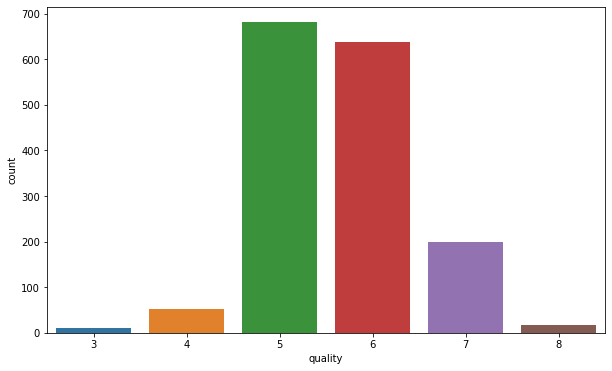

In [11]:
# counting the and plotting of quality column
plt.figure(figsize=(10, 6))
sns.countplot(df["quality"])
df["quality"].value_counts()

#heat map of the given dataset

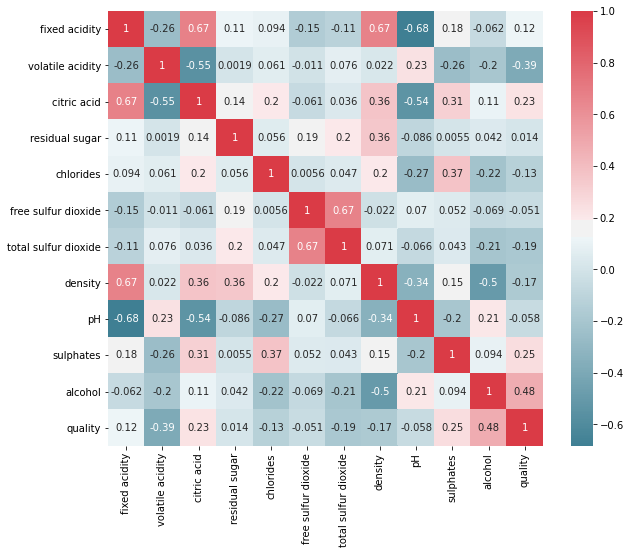

In [12]:
# visualizing the correleation between the columns
fig = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

#Adding a new colum to the dataset

In [13]:
# # Set a new field quality_label by transforming the existing quality column
# df['quality_label'] = df['quality'].apply(lambda value: 'low' if value <= 5 
#                                                               else 'medium' if value <= 7 
#                                                               else 'high')
# # Convert new field to categorical type
# df['quality_label'] = pd.Categorical(df['quality_label'], 
#                                        categories=['low', 'medium', 'high'])
bins = [1, 5, 6, 8]
df['quality_label'] = pd.cut(df.quality, bins, labels=['low', 'medium', 'high'], include_lowest=True)

In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


In [15]:
#columns of the dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

###Counting the no of low,medium,high in the dataset

In [16]:
#counting the low,medium and high 
df['quality_label'].value_counts()

low       744
medium    638
high      217
Name: quality_label, dtype: int64

In [17]:
df.groupby('quality_label').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_label,,,,,,,,,,,,
low,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
medium,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,6.000000
high,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


###Plotting a countplot using a quality_label

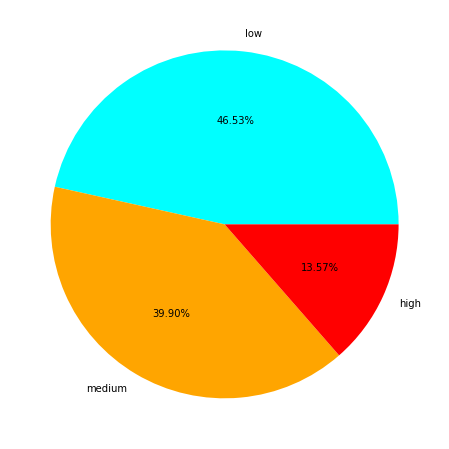

In [18]:
#pie plot of the quality label
plt.figure(figsize=(8,8))
label = ["low",'medium','high']
values=df['quality_label'].value_counts().values
plt.pie(values,labels=label,colors=['cyan','orange','red'],autopct='%1.2f%%')
plt.show()

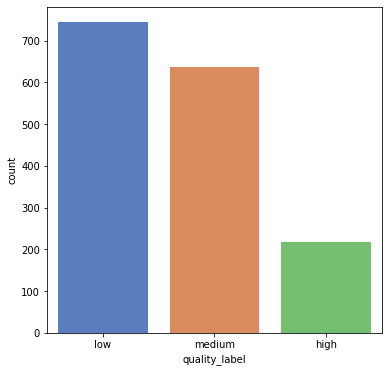

In [19]:
#Countplot of quality label
plt.figure(figsize=(6, 6))
sns.countplot(df['quality_label'], palette="muted")
plt.show()

#Data Visualization

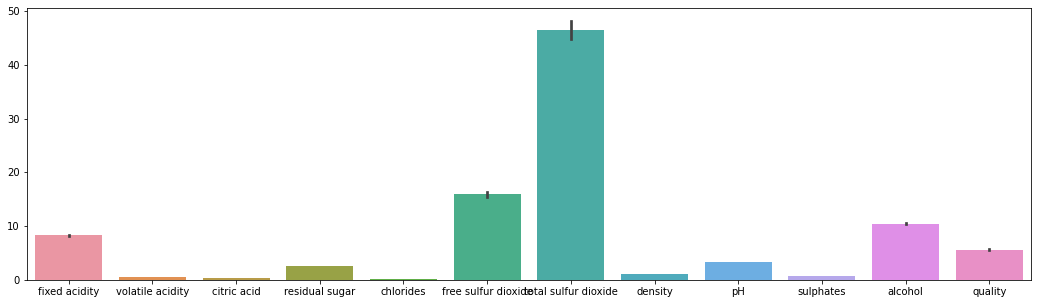

In [20]:
#Barplot of given Dataset
fig = plt.figure(figsize = (18,5))
sns.barplot(data = df)
plt.show()

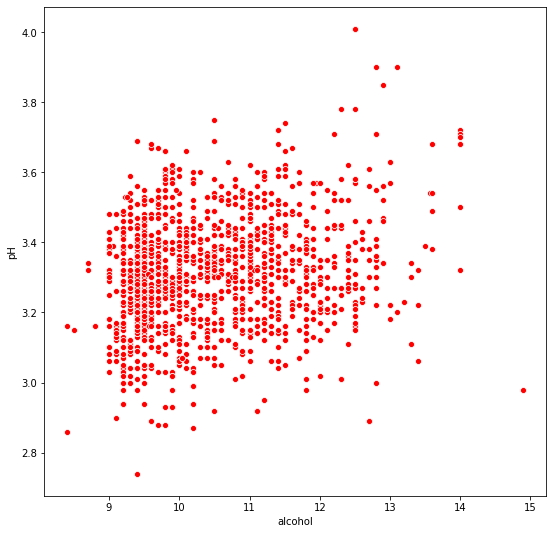

In [21]:
#Scatter plot of Alcohol and the PH
plt.figure(figsize=(9,9))
sns.scatterplot('alcohol','pH',data=df,color='red')
plt.show()

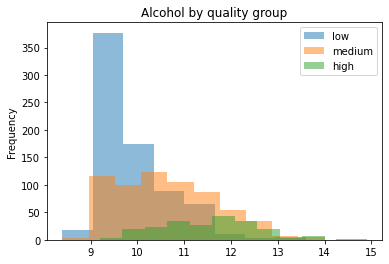

In [22]:
#visualizing  the variation of Alcohol in the different qualitys of wine
df.groupby('quality_label').alcohol.plot.hist(title='Alcohol by quality group',
                                              alpha=0.5, legend=True)
plt.show()

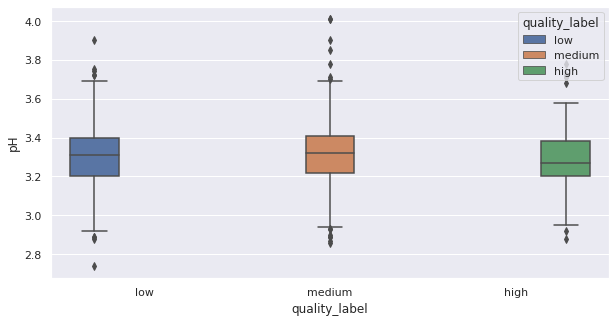

In [23]:
#visualizing  the variation of pH in the different qualitys of wine
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='pH', x='quality_label', hue='quality_label', data=df)
plt.show()

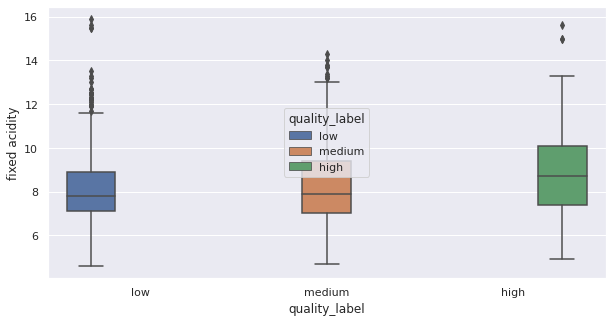

In [24]:
#visualizing  the variation of fixed acidity in the different qualitys of wine
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='fixed acidity', x='quality_label', hue='quality_label', data=df)
plt.show()

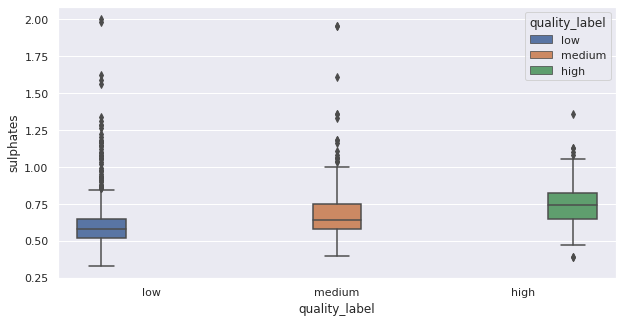

In [25]:
#visualizing  the variation of sulphates in the different qualitys of wine
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='sulphates', x='quality_label', hue='quality_label', data=df)
plt.show()

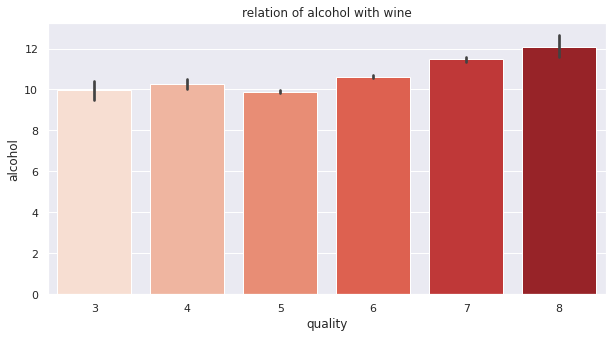

In [26]:
# checking the variation of fixed acidity in the different qualities of wine

sns.barplot(df['quality'], df['alcohol'], palette='Reds')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<Figure size 864x432 with 0 Axes>

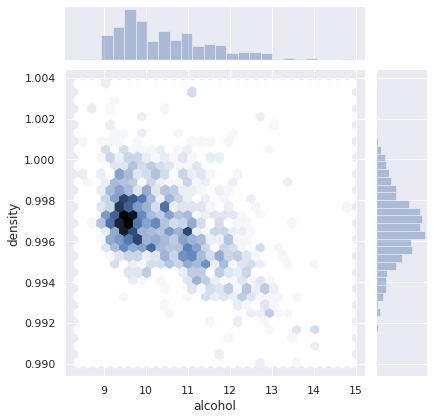

In [27]:
#density  in alcohol
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex")
plt.show()

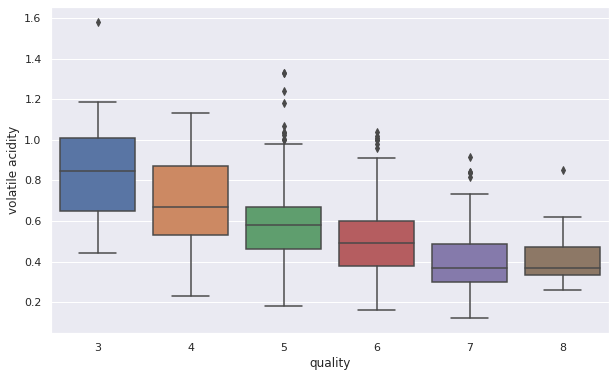

In [28]:
#quality with volatile acidity
#increasing the volatile it decrease the wine quality
fig = plt.figure(figsize = (10,6))
sns.boxplot(x = 'quality', y = 'volatile acidity', data = df)
plt.show()

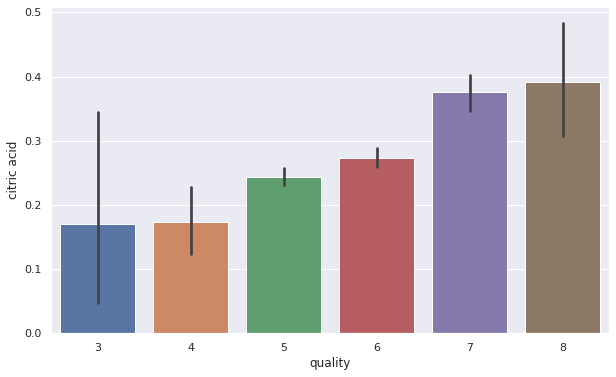

In [29]:
#quality with citric acid
# Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)
plt.show()

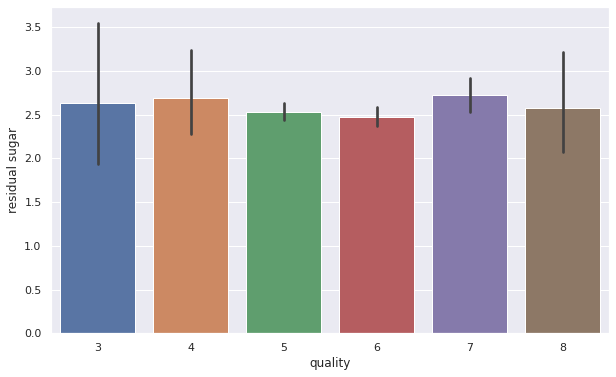

In [30]:
#quality with residual sugar
#It does not effect the wine quality
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)
plt.show()

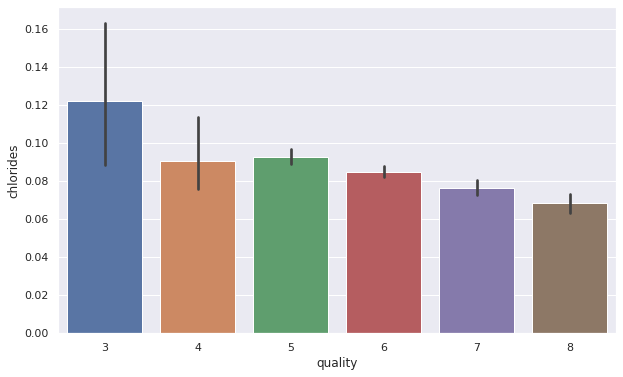

In [31]:
#quality with chlorides
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)
plt.show()

<function matplotlib.pyplot.show>

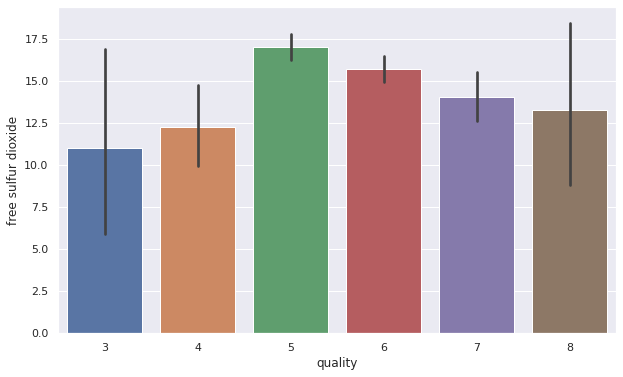

In [32]:
#quality with free sifur dioxide
#suifyr dioxide is different for different quailty of wins
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)
plt.show

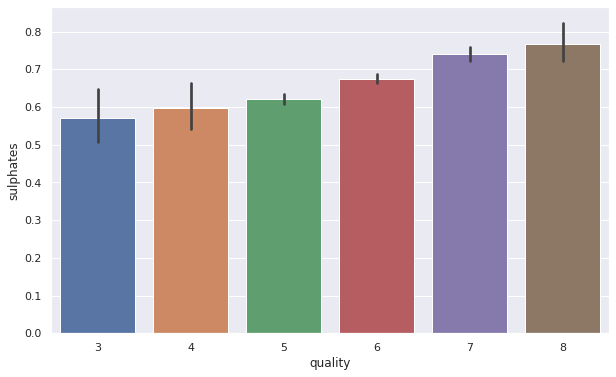

In [33]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)
plt.show()

###Histogram of the red wine data

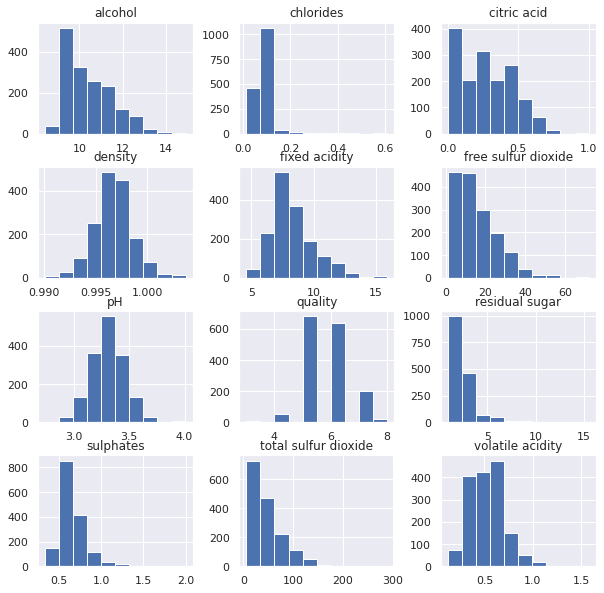

In [34]:
# Histogram of the dataset
df.hist(figsize=(10,10))
plt.show()

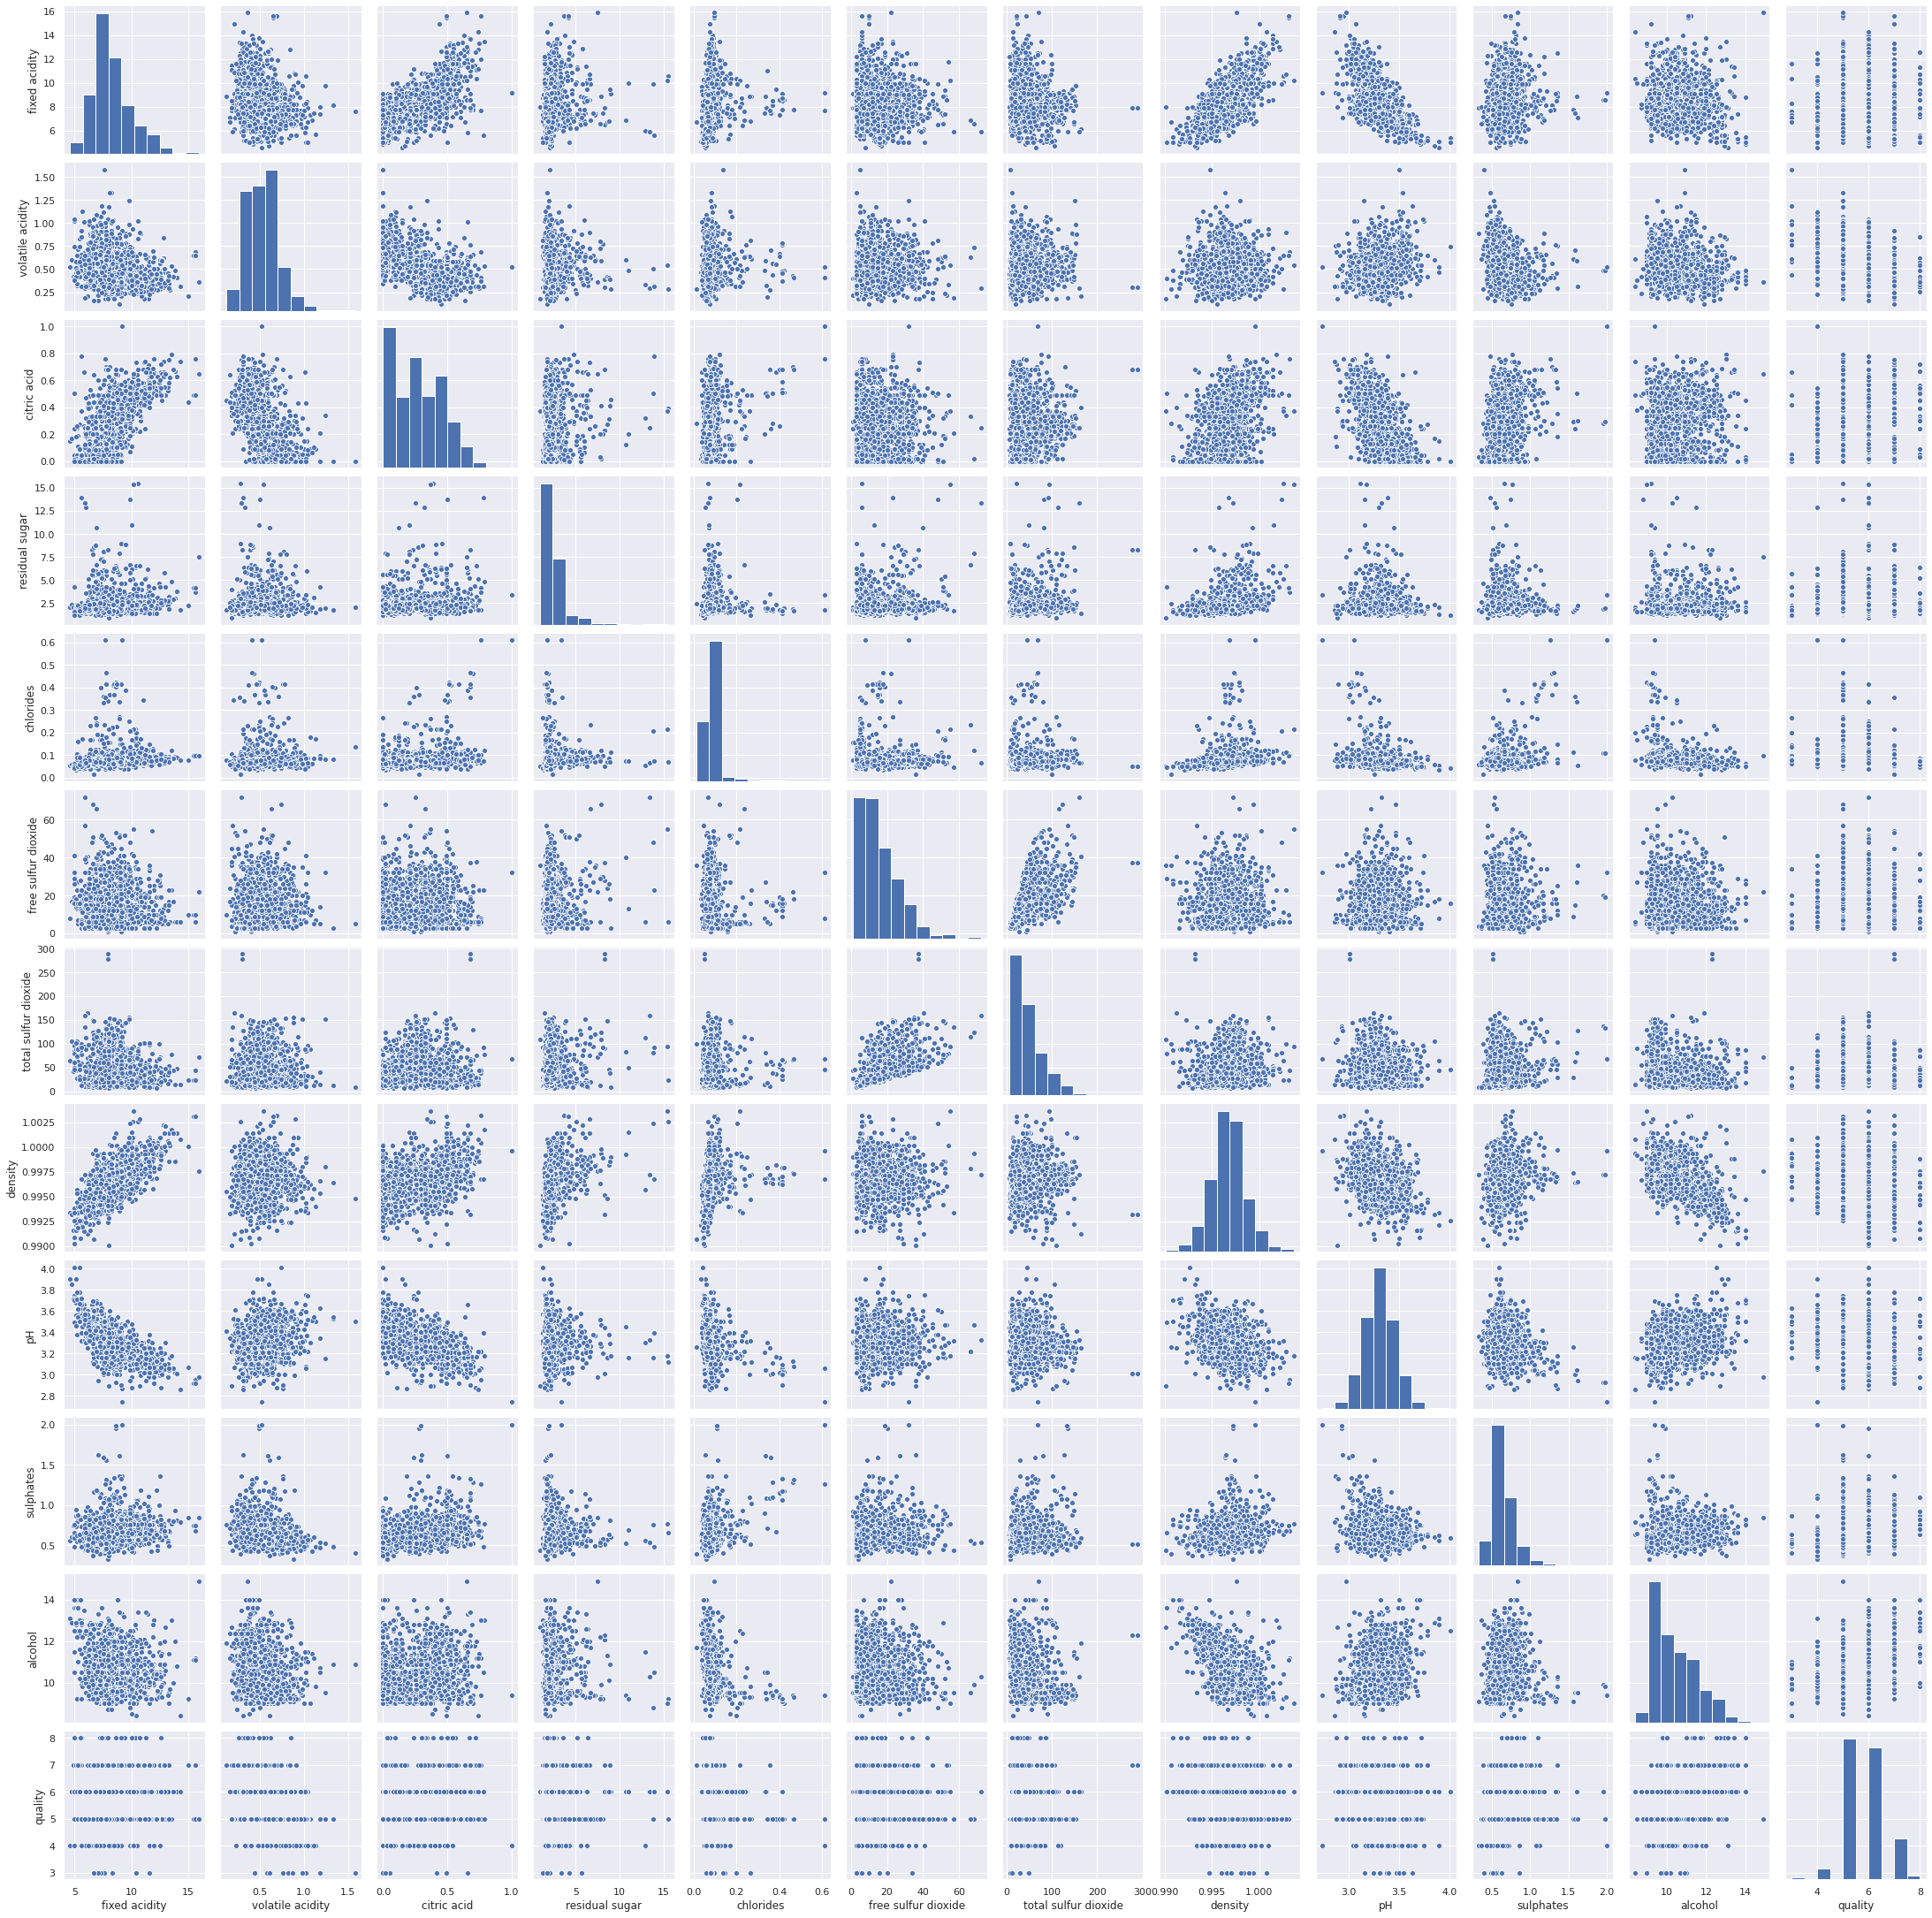

In [35]:
#pair plot of dataset
sns.pairplot(df)
plt.show()

In [36]:
#### Filtering df for only low quality
df_temp = df[df['quality_label']=='low']
print(df_temp)

      fixed acidity  volatile acidity  ...  quality  quality_label
0               7.4             0.700  ...        5            low
1               7.8             0.880  ...        5            low
2               7.8             0.760  ...        5            low
4               7.4             0.700  ...        5            low
5               7.4             0.660  ...        5            low
...             ...               ...  ...      ...            ...
1582            6.1             0.715  ...        5            low
1583            6.2             0.460  ...        5            low
1589            6.6             0.725  ...        5            low
1594            6.2             0.600  ...        5            low
1597            5.9             0.645  ...        5            low

[744 rows x 13 columns]


In [37]:
#### Filtering df for only medium quality
df_temp2 = df[df['quality_label']=='medium']
print(df_temp2)

      fixed acidity  volatile acidity  ...  quality  quality_label
3              11.2             0.280  ...        6         medium
19              7.9             0.320  ...        6         medium
20              8.9             0.220  ...        6         medium
24              6.9             0.400  ...        6         medium
29              7.8             0.645  ...        6         medium
...             ...               ...  ...      ...            ...
1592            6.3             0.510  ...        6         medium
1593            6.8             0.620  ...        6         medium
1595            5.9             0.550  ...        6         medium
1596            6.3             0.510  ...        6         medium
1598            6.0             0.310  ...        6         medium

[638 rows x 13 columns]


In [38]:
#### Filtering df for only high quality
df_temp3 = df[df['quality_label']== 'high']
print(df_temp3)

      fixed acidity  volatile acidity  ...  quality  quality_label
7               7.3              0.65  ...        7           high
8               7.8              0.58  ...        7           high
16              8.5              0.28  ...        7           high
37              8.1              0.38  ...        7           high
62              7.5              0.52  ...        7           high
...             ...               ...  ...      ...            ...
1541            7.4              0.25  ...        7           high
1544            8.4              0.37  ...        7           high
1549            7.4              0.36  ...        8           high
1555            7.0              0.56  ...        7           high
1584            6.7              0.32  ...        7           high

[217 rows x 13 columns]


#Splitting of Data

In [39]:
# dividing the dataset into dependent and independent variables

X = df.iloc[:,:11]
y = df.iloc[:,11]

# determining the shape of x and y.
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [40]:
#dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
# determining the shapes of training and testing sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

# Scaling for test data
scaled_X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
scaled_X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.644910,0.051016,-0.683192,-0.310468,-0.504370,-0.062753,-0.508882,-1.856471,0.266530,-0.290408,1.568472
1,0.090923,-1.919411,1.222880,-0.542153,-0.352382,2.829266,1.342243,-0.797302,0.133736,0.618096,1.287543
2,-0.418500,1.205122,-1.301378,-0.045686,-0.352382,-0.544756,-0.979507,-0.723529,1.328886,0.315261,1.193900
3,0.487140,-0.511963,1.274395,-0.178077,-0.091830,-0.159154,-0.697132,0.446299,0.266530,-0.290408,0.819329
4,0.373935,0.051016,1.119849,-0.442860,1.818878,-0.930359,-0.634382,0.393604,-0.264648,-0.290408,-0.959885
...,...,...,...,...,...,...,...,...,...,...,...
395,-0.984525,1.008080,-0.992285,0.020510,0.407559,-0.159154,-0.571632,-0.054303,0.864106,-0.472109,-0.210742
396,-0.305295,0.332505,-1.301378,-0.376664,-0.308956,-0.641157,-0.854007,0.024739,0.332928,-0.532676,-0.866242
397,-0.248692,-1.243836,2.098643,3.793664,-0.808346,2.106262,7.303492,-1.893357,-1.990976,-0.896078,1.755757
398,-0.361897,0.332505,-1.352893,-0.509055,0.016733,-0.351955,-0.854007,-0.565445,0.067339,-0.593243,0.070187


#DECISION TREE

In [44]:
# Apply the decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
# create an object
rtree = DecisionTreeClassifier(criterion='entropy')
# Applying the classifier to the dataset
rtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
#predict on training data
y_train_pred = rtree.predict(X_train)
y_train_pred

array([6, 5, 6, ..., 6, 5, 5])

In [46]:
#Classification report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))
confusion_matrix(y_train,y_train_pred)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       495
           6       1.00      1.00      1.00       491
           7       1.00      1.00      1.00       155
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



array([[  7,   0,   0,   0,   0,   0],
       [  0,  38,   0,   0,   0,   0],
       [  0,   0, 495,   0,   0,   0],
       [  0,   0,   0, 491,   0,   0],
       [  0,   0,   0,   0, 155,   0],
       [  0,   0,   0,   0,   0,  13]])

In [47]:
## predicting the testdata
y_test_pred = rtree.predict(X_test)
y_test_pred

array([6, 7, 7, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 7, 6, 4, 6, 7, 5, 4, 5, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 7, 4, 5, 5, 6, 6, 7, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6, 7, 6, 5,
       5, 5, 6, 6, 6, 6, 4, 7, 5, 5, 5, 6, 5, 5, 4, 6, 6, 5, 4, 6, 6, 5,
       6, 6, 7, 6, 5, 7, 4, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 8, 7, 7, 7, 7, 5, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 8, 5, 5,
       6, 5, 6, 5, 5, 5, 4, 5, 7, 5, 5, 5, 5, 6, 7, 7, 5, 5, 6, 5, 5, 5,
       5, 6, 4, 5, 6, 5, 5, 7, 7, 7, 6, 4, 6, 5, 5, 6, 7, 5, 5, 5, 5, 5,
       6, 5, 6, 6, 8, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 5, 6,
       5, 6, 4, 5, 5, 6, 5, 5, 6, 7, 8, 6, 6, 6, 5, 4, 5, 5, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 7, 4, 5, 5, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 7, 7,
       6, 5, 6, 6, 5, 6, 6, 4, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6,
       7, 5, 4, 7, 5, 3, 6, 6, 6, 6, 7, 7, 6, 6, 5,

In [48]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.25      0.33      0.29        15
           5       0.73      0.66      0.69       186
           6       0.56      0.61      0.58       147
           7       0.47      0.52      0.49        44
           8       0.25      0.20      0.22         5

    accuracy                           0.60       400
   macro avg       0.38      0.39      0.38       400
weighted avg       0.61      0.60      0.60       400



In [49]:
# Visualisation of the decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(rtree,X_train,y_train,cv=5)

array([0.6       , 0.60833333, 0.57083333, 0.57916667, 0.59832636])

In [51]:
## Hyperparameters
grid_param = {'criterion':['gini','entropy'],
             'max_depth': range(2,10,1),
             'min_samples_leaf' : range(1,10,1)}

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rtree, param_grid=grid_param)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [53]:
# returns the optimal parameters.
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [54]:
# Apply the decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
# create an object
rtree = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)
# Applying the classifier to the dataset
rtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
y_train_pred = rtree.predict(X_train)
y_train_pred

array([5, 5, 6, ..., 6, 5, 5])

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_train,y_train_pred))
dec_train = accuracy_score(y_train,y_train_pred)  

              precision    recall  f1-score   support

           3       0.80      0.57      0.67         7
           4       1.00      0.61      0.75        38
           5       0.88      0.85      0.86       495
           6       0.77      0.89      0.82       491
           7       0.92      0.67      0.78       155
           8       1.00      0.69      0.82        13

    accuracy                           0.83      1199
   macro avg       0.89      0.71      0.78      1199
weighted avg       0.84      0.83      0.83      1199



In [57]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=9,min_samples_leaf=1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
pred_test = clf.predict(X_test)
print(classification_report(y_test,pred_test))
dec_test = accuracy_score(y_test,pred_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.70      0.62      0.66       186
           6       0.53      0.66      0.59       147
           7       0.38      0.36      0.37        44
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.27      0.27      0.27       400
weighted avg       0.56      0.57      0.56       400



#Logistic Regression

In [59]:
#importing the model class
from sklearn.linear_model import LogisticRegression
# creating an object for Logistic Regression
log_reg = LogisticRegression() 
#fitting the input and output of training data to the object and building the model
log_reg.fit(scaled_X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# predicting the output of the training data
y_train_pred = log_reg.predict(scaled_X_train)
y_train_pred

array([5, 5, 6, ..., 5, 5, 6])

In [61]:
from sklearn.metrics import accuracy_score
print("Training data accuracy:",accuracy_score(y_train,y_train_pred))
log_train = accuracy_score(y_train,y_train_pred)

Training data accuracy: 0.6163469557964971


In [62]:
y_test_pred = log_reg.predict(scaled_X_test)
y_test_pred

array([6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 7, 6, 5, 6, 5, 5, 6, 7, 4, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5,
       5, 5, 5, 6, 5, 6, 4, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5,
       5, 6, 7, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5,
       6, 6, 6, 7, 6, 6, 5, 5, 7, 6, 6, 5, 6, 6, 5, 6, 5, 5, 4, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 5, 6, 7, 6, 5, 5, 6, 6,
       6, 5, 7, 7, 7, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 5,
       6, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 7, 4, 5, 5, 5, 7, 5, 7, 5,
       5, 6, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5,

In [63]:
print("Testing data accuracy:",accuracy_score(y_test,y_test_pred))
log_test = accuracy_score(y_test,y_test_pred)

Testing data accuracy: 0.5975


#RANDOM FOREST

In [64]:
#import , initialize and fit
#import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier
#initialize the object for RFC
rfc = RandomForestClassifier(n_estimators=200)
#fit the RFC to the dataset
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
#predictions on training data
#syntax: objectname.predict(inputvalues)
y_pred_train = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix ,classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       495
           6       1.00      1.00      1.00       491
           7       1.00      1.00      1.00       155
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [66]:
#prediction on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.75      0.78      0.77       186
           6       0.63      0.70      0.66       147
           7       0.54      0.50      0.52        44
           8       1.00      0.20      0.33         5

    accuracy                           0.68       400
   macro avg       0.49      0.36      0.38       400
weighted avg       0.65      0.68      0.66       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#CrossValidationScore
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.6755822873082288

In [68]:
# using hyperparameters 
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1)
    }

In [69]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [70]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2}

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion= 'entropy', max_depth= 9, min_samples_leaf= 1)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred_train = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00       495
           6       1.00      1.00      1.00       491
           7       1.00      1.00      1.00       155
           8       1.00      1.00      1.00        13

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [73]:
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test,y_pred_test))
ran_train = accuracy_score(y_train,y_pred_train)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.77      0.77      0.77       186
           6       0.63      0.73      0.68       147
           7       0.53      0.48      0.50        44
           8       1.00      0.20      0.33         5

    accuracy                           0.68       400
   macro avg       0.49      0.36      0.38       400
weighted avg       0.66      0.68      0.67       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc,X_train,y_train,cv=5)
print(np.mean(scores))
ran_test = accuracy_score(y_test,y_pred_test)

0.6755892608089261


####using gradientboosting classifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()
gdc.fit(X_train,y_train)
y_pred = gdc.predict(X_test)
print("train accuracy: ",accuracy_score(y_train,gdc.predict(X_train)))
print("test accuracy: ",accuracy_score(y_pred,y_test))
grad_train = accuracy_score(y_train,gdc.predict(X_train))
grad_test = accuracy_score(y_pred,y_test)

train accuracy:  0.9040867389491243
test accuracy:  0.65


In [76]:
# using xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
preds = xgb.predict(X_test)
print("train accuracy: ",accuracy_score(y_train,xgb.predict(X_train)))
print("test accuracy: ",accuracy_score(preds,y_test))
xg_train = accuracy_score(y_train,xgb.predict(X_train))
xg_test = accuracy_score(preds,y_test)

train accuracy:  0.823185988323603
test accuracy:  0.6375


#From all the above models, visualizing the best model.

In [83]:
acc = {'Decision_train':dec_train,'Decision_test':dec_test,
       'Logistic_train':log_train,'Logistic_test':log_test,
       'RandomForest_train':ran_train,'RandomForest_test':ran_test,
       'GradientBoost_train':grad_train,'GradientBoost_test':grad_test,
       'XGBoost_train':xg_train,'XGBoost_test':xg_test}
x = acc.keys()
y = acc.values()

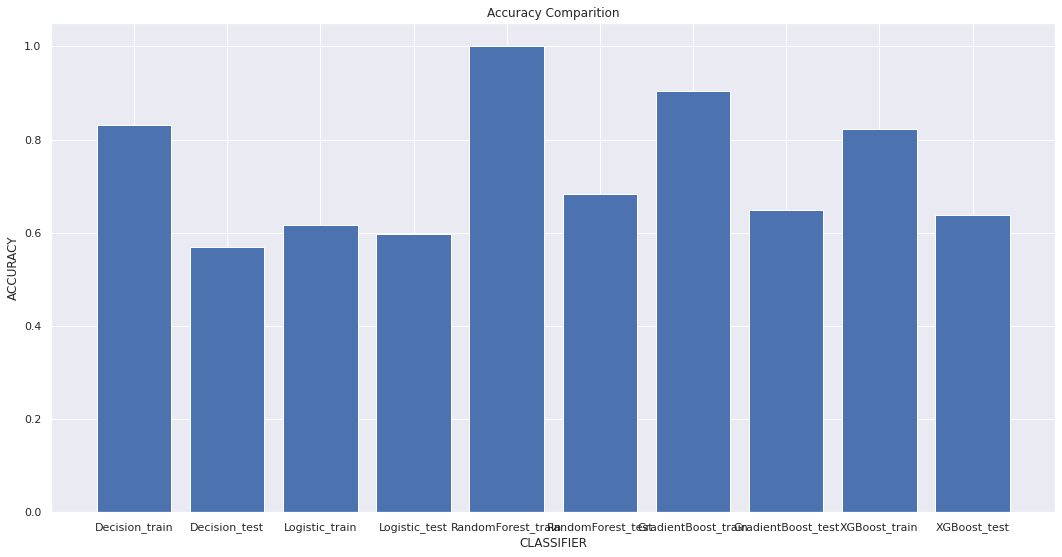

In [84]:
plt.figure(figsize=(18,9))
plt.xlabel("CLASSIFIER")
plt.ylabel("ACCURACY")
plt.title("Accuracy Comparition")
plt.bar(list(x),list(y))
plt.show()

In [79]:
## RandomForest  performed the best.

#Now using RandomForest to predict a sample input

In [80]:
## buliding a model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
input_sample = [[7.4 ,0.59 ,0.08 ,4.4,0.086,6,29,0.9974,3.38,0.5,9]]
rfc.predict(input_sample)

array([4])

In [82]:
## we predicted an output of 4 for the sample data that we have given to the model.